In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

In [2]:
from functools import partial

In [3]:
df=pd.read_csv('telco2.csv')

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,NaN,No
4,9237-HQITU,Female,0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.shape

(7032, 21)

In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7023.000000,7032.000000,7025.000000
mean,0.162400,32.430158,64.798208,2282.239317
std,0.368844,24.546817,30.085974,2266.150569
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.500000
50%,0.000000,29.000000,70.350000,1396.900000
75%,0.000000,55.000000,89.862500,3791.600000
max,1.000000,72.000000,118.750000,8684.800000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
customerID          7032 non-null object
gender              7032 non-null object
SeniorCitizen       7032 non-null int64
Partner             7032 non-null object
Dependents          7032 non-null object
tenure              7023 non-null float64
PhoneService        7032 non-null object
MultipleLines       7032 non-null object
InternetService     7032 non-null object
OnlineSecurity      7032 non-null object
OnlineBackup        7029 non-null object
DeviceProtection    7025 non-null object
TechSupport         7032 non-null object
StreamingTV         7032 non-null object
StreamingMovies     7032 non-null object
Contract            7032 non-null object
PaperlessBilling    7032 non-null object
PaymentMethod       7032 non-null object
MonthlyCharges      7032 non-null float64
TotalCharges        7025 non-null float64
Churn               7032 non-null object
dtypes: float64(3), int64(1), 

In [8]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              9
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        3
DeviceProtection    7
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        7
Churn               0
dtype: int64

In [9]:
df.fillna(df.median(), inplace=True)

In [10]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        3
DeviceProtection    7
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
df = df.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [12]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [13]:
df.duplicated().sum()

0

In [14]:
#Separate out independent categorical variables for conversion into numerical
df_catg=df.loc[:,('gender','Partner', 'Dependents','PhoneService', 'MultipleLines', 
                 'InternetService',    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod','SeniorCitizen')]

In [15]:
df_num=df.loc[:,('tenure','MonthlyCharges','TotalCharges')]

In [16]:
df['Churn'] = df['Churn'].replace(to_replace =["No","Yes"], 
                 value =[0,1])

In [17]:
# Convert categorical variables into dummy coding
df_dummy=pd.get_dummies(df_catg)

In [18]:
df_dummy.shape

(7032, 42)

In [19]:
df_dummy.head()

,SeniorCitizen,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,0,1,1,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
1,0,0,1,1,0,1,0,0,1,1,...,0,0,1,0,1,0,0,0,0,1
2,0,0,1,1,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,0,1
3,0,0,1,1,0,1,0,1,0,0,...,0,0,1,0,1,0,1,0,0,0
4,0,1,0,1,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0


In [20]:
df_dummy.drop(columns=['Partner_No', 'Dependents_No','MultipleLines_No phone service',
                               'OnlineSecurity_No internet service','OnlineBackup_No internet service',
                               'TechSupport_No internet service','StreamingTV_No internet service',
                               'StreamingMovies_No internet service','gender_Female','DeviceProtection_No internet service'], axis = 1, inplace = True)

In [21]:
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 32 columns):
SeniorCitizen                              7032 non-null int64
gender_Male                                7032 non-null uint8
Partner_Yes                                7032 non-null uint8
Dependents_Yes                             7032 non-null uint8
PhoneService_No                            7032 non-null uint8
PhoneService_Yes                           7032 non-null uint8
MultipleLines_No                           7032 non-null uint8
MultipleLines_Yes                          7032 non-null uint8
InternetService_DSL                        7032 non-null uint8
InternetService_Fiber optic                7032 non-null uint8
InternetService_No                         7032 non-null uint8
OnlineSecurity_No                          7032 non-null uint8
OnlineSecurity_Yes                         7032 non-null uint8
OnlineBackup_No                            7032 non-null uint8
OnlineBacku

In [22]:
df1=pd.concat([df_num,df_dummy],axis=1)

In [23]:
df1.shape

(7032, 35)

In [24]:
from sklearn.model_selection import train_test_split

In [126]:
x_train, x_test, y_train, y_test = train_test_split(df1, df['Churn'], test_size=0.20, random_state=4)

In [106]:
x_train.shape

(5625, 35)

In [29]:
x_test.shape

(1407, 35)

In [30]:
y_train.shape

(5625,)

In [31]:
y_test.shape

(1407,)

In [70]:
n_inputs = 35
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 2
learning_rate = 0.01
dropout_rate = 0.5

In [27]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

In [73]:
reset_graph()

batch_norm_momentum = 0.9

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")
training = tf.placeholder_with_default(False, shape=(), name='training')

with tf.name_scope("dnn"):
    he_init = tf.contrib.layers.variance_scaling_initializer()

    my_batch_norm_layer = partial(
            tf.layers.batch_normalization,
            training=training,
            momentum=batch_norm_momentum)

    my_dense_layer = partial(
            tf.layers.dense,
            kernel_initializer=he_init)

    hidden1 = my_dense_layer(X, n_hidden1, name="hidden1")
    # Apply dropout to the first hidden layer
    hidden1_drop = tf.layers.dropout(hidden1, dropout_rate, training=training)
    bn1 = tf.nn.selu(my_batch_norm_layer(hidden1_drop))
    hidden2 = my_dense_layer(bn1, n_hidden2, name="hidden2")
    hidden2_drop = tf.layers.dropout(hidden2, dropout_rate, training=training)
    bn2 = tf.nn.selu(my_batch_norm_layer(hidden2_drop))
    logits_before_bn = my_dense_layer(bn2, n_outputs, name="outputs")
    logits = my_batch_norm_layer(logits_before_bn)

with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

with tf.name_scope("train"):
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
    training_op = optimizer.minimize(loss)

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [74]:
# Execution phase

n_epochs = 100
batch_size = 194
m = x_train.shape[0]
n_batches = int(np.ceil(m / batch_size))

def fetch_batch(epoch, batch_index, batch_size):
    for i in range(0, m, batch_size):
        X_batch = x_train[i:i+batch_size]
        y_batch = y_train[i:i+batch_size]
    return X_batch, y_batch

# When is_training is True the moving_mean and moving_variance need to be updated by running these commands
# extra_update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
# sess.run([train_op, extra_update_ops], ...)

extra_update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for batch_index in range(n_batches):
            X_batch, y_batch = fetch_batch(epoch, batch_index, batch_size)
            sess.run([training_op, extra_update_ops],
                     feed_dict={training: True, X: X_batch, y: y_batch})
        accuracy_val = accuracy.eval(feed_dict={X: x_test,
                                                y: y_test})
        print(epoch, "Test accuracy:", accuracy_val)

0 Test accuracy: 0.7022033
1 Test accuracy: 0.7690121
2 Test accuracy: 0.7754087
3 Test accuracy: 0.76616913
4 Test accuracy: 0.78678036
5 Test accuracy: 0.7789623
6 Test accuracy: 0.7761194
7 Test accuracy: 0.77683014
8 Test accuracy: 0.76830137
9 Test accuracy: 0.76119405
10 Test accuracy: 0.7761194
11 Test accuracy: 0.77327645
12 Test accuracy: 0.7711443
13 Test accuracy: 0.771855
14 Test accuracy: 0.76830137
15 Test accuracy: 0.7590618
16 Test accuracy: 0.75977254
17 Test accuracy: 0.75124377
18 Test accuracy: 0.76759064
19 Test accuracy: 0.76616913
20 Test accuracy: 0.7647477
21 Test accuracy: 0.76687986
22 Test accuracy: 0.7697228
23 Test accuracy: 0.7583511
24 Test accuracy: 0.7356077
25 Test accuracy: 0.7633262
26 Test accuracy: 0.75408673
27 Test accuracy: 0.7583511
28 Test accuracy: 0.75408673
29 Test accuracy: 0.76616913
30 Test accuracy: 0.7562189
31 Test accuracy: 0.7633262
32 Test accuracy: 0.75124377
33 Test accuracy: 0.76687986
34 Test accuracy: 0.7469794
35 Test accura

In [65]:
learning_rate

<tf.Tensor 'train/ExponentialDecay:0' shape=() dtype=float32>

In [71]:
x_train.shape

(5625, 35)

In [28]:
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import load_model

In [128]:
model1 = models.Sequential()

In [127]:
he_init = tf.keras.initializers.VarianceScaling(
    scale=1.0, mode='fan_avg', distribution='truncated_normal',
    seed=5
)


In [129]:

model1.add(tf.keras.Input(shape=(35)))
model1.add(tf.keras.layers.Dense(300,kernel_initializer=he_init,activation=None))
model1.add(tf.keras.layers.BatchNormalization(momentum=0.9))
model1.add(tf.keras.layers.Dense(300,kernel_initializer=he_init,activation=tf.nn.selu))
model1.add(tf.keras.layers.Dropout(0.5))
model1.add(tf.keras.layers.Dense(100,kernel_initializer=he_init,activation=None))
model1.add(tf.keras.layers.BatchNormalization(momentum=0.9))
model1.add(tf.keras.layers.Dense(100,kernel_initializer=he_init,activation=tf.nn.selu))
model1.add(tf.keras.layers.Dropout(0.5))
model1.add(tf.keras.layers.Dense(2))
print(model1.summary())

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_63 (Dense)             (None, 300)               10800     
_________________________________________________________________
batch_normalization_19 (Batc (None, 300)               1200      
_________________________________________________________________
dense_64 (Dense)             (None, 300)               90300     
_________________________________________________________________
dropout_26 (Dropout)         (None, 300)               0         
_________________________________________________________________
dense_65 (Dense)             (None, 100)               30100     
_________________________________________________________________
batch_normalization_20 (Batc (None, 100)               400       
_________________________________________________________________
dense_66 (Dense)             (None, 100)             

In [130]:
model1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [131]:
model1.fit(x_train, y_train, epochs=500, batch_size=194, shuffle=True, validation_split=0.1)

Train on 5062 samples, validate on 563 samples
Epoch 1/500
5062/5062 [==============================] - 2s 377us/sample - loss: 0.8303 - acc: 0.6492 - val_loss: 0.4620 - val_acc: 0.7780
Epoch 2/500
5062/5062 [==============================] - 0s 51us/sample - loss: 0.6194 - acc: 0.7228 - val_loss: 0.4645 - val_acc: 0.7744
Epoch 3/500
5062/5062 [==============================] - 0s 52us/sample - loss: 0.5717 - acc: 0.7351 - val_loss: 0.4960 - val_acc: 0.7584
Epoch 4/500
5062/5062 [==============================] - 0s 51us/sample - loss: 0.5344 - acc: 0.7485 - val_loss: 0.4825 - val_acc: 0.7744
Epoch 5/500
5062/5062 [==============================] - 0s 49us/sample - loss: 0.5196 - acc: 0.7657 - val_loss: 0.4527 - val_acc: 0.8011
Epoch 6/500
5062/5062 [==============================] - 0s 52us/sample - loss: 0.5024 - acc: 0.7697 - val_loss: 0.4368 - val_acc: 0.7940
Epoch 7/500
5062/5062 [==============================] - 0s 51us/sample - loss: 0.4910 - acc: 0.7720 - val_loss: 0.4439 - va

5062/5062 [==============================] - 0s 50us/sample - loss: 0.4279 - acc: 0.8019 - val_loss: 0.4187 - val_acc: 0.8046
Epoch 60/500
5062/5062 [==============================] - 0s 49us/sample - loss: 0.4243 - acc: 0.8028 - val_loss: 0.4123 - val_acc: 0.7975
Epoch 61/500
5062/5062 [==============================] - 0s 49us/sample - loss: 0.4314 - acc: 0.7989 - val_loss: 0.4115 - val_acc: 0.7922
Epoch 62/500
5062/5062 [==============================] - 0s 49us/sample - loss: 0.4266 - acc: 0.7991 - val_loss: 0.4192 - val_acc: 0.8011
Epoch 63/500
5062/5062 [==============================] - 0s 50us/sample - loss: 0.4315 - acc: 0.8019 - val_loss: 0.4112 - val_acc: 0.7975
Epoch 64/500
5062/5062 [==============================] - 0s 49us/sample - loss: 0.4287 - acc: 0.8032 - val_loss: 0.4277 - val_acc: 0.8028
Epoch 65/500
5062/5062 [==============================] - 0s 50us/sample - loss: 0.4216 - acc: 0.8026 - val_loss: 0.4217 - val_acc: 0.7922
Epoch 66/500
5062/5062 [================

Epoch 118/500
5062/5062 [==============================] - 0s 49us/sample - loss: 0.4216 - acc: 0.8052 - val_loss: 0.4091 - val_acc: 0.8011
Epoch 119/500
5062/5062 [==============================] - 0s 49us/sample - loss: 0.4230 - acc: 0.8066 - val_loss: 0.4155 - val_acc: 0.8011
Epoch 120/500
5062/5062 [==============================] - 0s 50us/sample - loss: 0.4220 - acc: 0.8030 - val_loss: 0.4380 - val_acc: 0.7922
Epoch 121/500
5062/5062 [==============================] - 0s 50us/sample - loss: 0.4268 - acc: 0.8017 - val_loss: 0.4202 - val_acc: 0.7922
Epoch 122/500
5062/5062 [==============================] - 0s 50us/sample - loss: 0.4268 - acc: 0.8017 - val_loss: 0.4349 - val_acc: 0.7922
Epoch 123/500
5062/5062 [==============================] - 0s 49us/sample - loss: 0.4251 - acc: 0.8062 - val_loss: 0.4170 - val_acc: 0.7940
Epoch 124/500
5062/5062 [==============================] - 0s 50us/sample - loss: 0.4247 - acc: 0.8019 - val_loss: 0.4198 - val_acc: 0.7904
Epoch 125/500
5062/5

5062/5062 [==============================] - 0s 51us/sample - loss: 0.4242 - acc: 0.8026 - val_loss: 0.4211 - val_acc: 0.7957
Epoch 177/500
5062/5062 [==============================] - 0s 52us/sample - loss: 0.4225 - acc: 0.8048 - val_loss: 0.4060 - val_acc: 0.8011
Epoch 178/500
5062/5062 [==============================] - 0s 50us/sample - loss: 0.4253 - acc: 0.8011 - val_loss: 0.4124 - val_acc: 0.7993
Epoch 179/500
5062/5062 [==============================] - 0s 54us/sample - loss: 0.4246 - acc: 0.8026 - val_loss: 0.4056 - val_acc: 0.7957
Epoch 180/500
5062/5062 [==============================] - 0s 50us/sample - loss: 0.4215 - acc: 0.8034 - val_loss: 0.4191 - val_acc: 0.7940
Epoch 181/500
5062/5062 [==============================] - 0s 51us/sample - loss: 0.4270 - acc: 0.8007 - val_loss: 0.4079 - val_acc: 0.7957
Epoch 182/500
5062/5062 [==============================] - 0s 52us/sample - loss: 0.4210 - acc: 0.8024 - val_loss: 0.4060 - val_acc: 0.7922
Epoch 183/500
5062/5062 [=========

5062/5062 [==============================] - 0s 51us/sample - loss: 0.4251 - acc: 0.8001 - val_loss: 0.4202 - val_acc: 0.7975
Epoch 235/500
5062/5062 [==============================] - 0s 50us/sample - loss: 0.4199 - acc: 0.8044 - val_loss: 0.4082 - val_acc: 0.7993
Epoch 236/500
5062/5062 [==============================] - 0s 51us/sample - loss: 0.4186 - acc: 0.8072 - val_loss: 0.4031 - val_acc: 0.7993
Epoch 237/500
5062/5062 [==============================] - 0s 52us/sample - loss: 0.4253 - acc: 0.7993 - val_loss: 0.4231 - val_acc: 0.7904
Epoch 238/500
5062/5062 [==============================] - 0s 51us/sample - loss: 0.4264 - acc: 0.8007 - val_loss: 0.4026 - val_acc: 0.8011
Epoch 239/500
5062/5062 [==============================] - 0s 50us/sample - loss: 0.4224 - acc: 0.8032 - val_loss: 0.4059 - val_acc: 0.8028
Epoch 240/500
5062/5062 [==============================] - 0s 52us/sample - loss: 0.4239 - acc: 0.8013 - val_loss: 0.4024 - val_acc: 0.8064
Epoch 241/500
5062/5062 [=========

5062/5062 [==============================] - 0s 49us/sample - loss: 0.4199 - acc: 0.8028 - val_loss: 0.4080 - val_acc: 0.8028
Epoch 293/500
5062/5062 [==============================] - 0s 48us/sample - loss: 0.4167 - acc: 0.8048 - val_loss: 0.4091 - val_acc: 0.8011
Epoch 294/500
5062/5062 [==============================] - 0s 49us/sample - loss: 0.4195 - acc: 0.8052 - val_loss: 0.4103 - val_acc: 0.8011
Epoch 295/500
5062/5062 [==============================] - 0s 50us/sample - loss: 0.4182 - acc: 0.8064 - val_loss: 0.4071 - val_acc: 0.8046
Epoch 296/500
5062/5062 [==============================] - 0s 51us/sample - loss: 0.4161 - acc: 0.8046 - val_loss: 0.4223 - val_acc: 0.7975
Epoch 297/500
5062/5062 [==============================] - 0s 50us/sample - loss: 0.4174 - acc: 0.8011 - val_loss: 0.4246 - val_acc: 0.7975
Epoch 298/500
5062/5062 [==============================] - 0s 50us/sample - loss: 0.4158 - acc: 0.8058 - val_loss: 0.4015 - val_acc: 0.7993
Epoch 299/500
5062/5062 [=========

5062/5062 [==============================] - 0s 50us/sample - loss: 0.4165 - acc: 0.8017 - val_loss: 0.4052 - val_acc: 0.8064
Epoch 351/500
5062/5062 [==============================] - 0s 50us/sample - loss: 0.4177 - acc: 0.8060 - val_loss: 0.4093 - val_acc: 0.7993
Epoch 352/500
5062/5062 [==============================] - 0s 49us/sample - loss: 0.4207 - acc: 0.7975 - val_loss: 0.4858 - val_acc: 0.7229
Epoch 353/500
5062/5062 [==============================] - 0s 50us/sample - loss: 0.4233 - acc: 0.8003 - val_loss: 0.4068 - val_acc: 0.8011
Epoch 354/500
5062/5062 [==============================] - 0s 50us/sample - loss: 0.4224 - acc: 0.8028 - val_loss: 0.4308 - val_acc: 0.7869
Epoch 355/500
5062/5062 [==============================] - 0s 50us/sample - loss: 0.4181 - acc: 0.8058 - val_loss: 0.4049 - val_acc: 0.8011
Epoch 356/500
5062/5062 [==============================] - 0s 49us/sample - loss: 0.4178 - acc: 0.8048 - val_loss: 0.4078 - val_acc: 0.8028
Epoch 357/500
5062/5062 [=========

5062/5062 [==============================] - 0s 50us/sample - loss: 0.4176 - acc: 0.8024 - val_loss: 0.4372 - val_acc: 0.7975
Epoch 409/500
5062/5062 [==============================] - 0s 51us/sample - loss: 0.4189 - acc: 0.8046 - val_loss: 0.4084 - val_acc: 0.8046
Epoch 410/500
5062/5062 [==============================] - 0s 52us/sample - loss: 0.4167 - acc: 0.8024 - val_loss: 0.4090 - val_acc: 0.7957
Epoch 411/500
5062/5062 [==============================] - 0s 50us/sample - loss: 0.4186 - acc: 0.8040 - val_loss: 0.4050 - val_acc: 0.7993
Epoch 412/500
5062/5062 [==============================] - 0s 51us/sample - loss: 0.4169 - acc: 0.8052 - val_loss: 0.4034 - val_acc: 0.8046
Epoch 413/500
5062/5062 [==============================] - 0s 51us/sample - loss: 0.4169 - acc: 0.8032 - val_loss: 0.4280 - val_acc: 0.8064
Epoch 414/500
5062/5062 [==============================] - 0s 50us/sample - loss: 0.4170 - acc: 0.8056 - val_loss: 0.4062 - val_acc: 0.7957
Epoch 415/500
5062/5062 [=========

5062/5062 [==============================] - 0s 49us/sample - loss: 0.4169 - acc: 0.8052 - val_loss: 0.4216 - val_acc: 0.7922
Epoch 467/500
5062/5062 [==============================] - 0s 48us/sample - loss: 0.4148 - acc: 0.8060 - val_loss: 0.4138 - val_acc: 0.8028
Epoch 468/500
5062/5062 [==============================] - 0s 48us/sample - loss: 0.4145 - acc: 0.8040 - val_loss: 0.4075 - val_acc: 0.7975
Epoch 469/500
5062/5062 [==============================] - 0s 49us/sample - loss: 0.4178 - acc: 0.8088 - val_loss: 0.4186 - val_acc: 0.8028
Epoch 470/500
5062/5062 [==============================] - 0s 51us/sample - loss: 0.4125 - acc: 0.8070 - val_loss: 0.4070 - val_acc: 0.8028
Epoch 471/500
5062/5062 [==============================] - 0s 50us/sample - loss: 0.4181 - acc: 0.8013 - val_loss: 0.4040 - val_acc: 0.7993
Epoch 472/500
5062/5062 [==============================] - 0s 50us/sample - loss: 0.4158 - acc: 0.8048 - val_loss: 0.4211 - val_acc: 0.7957
Epoch 473/500
5062/5062 [=========

In [134]:
test_loss, test_acc = model1.evaluate(x_test,  y_test, verbose=2)

1407/1407 - 0s - loss: 0.4185 - acc: 0.8074


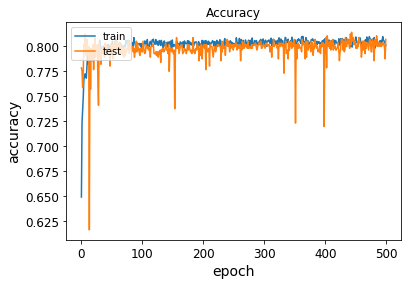

In [138]:
plt.plot(model1.history.history['acc'])
plt.plot(model1.history.history['val_acc'])
plt.title("Accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(['train', 'test'], loc='upper left')
plt.show()

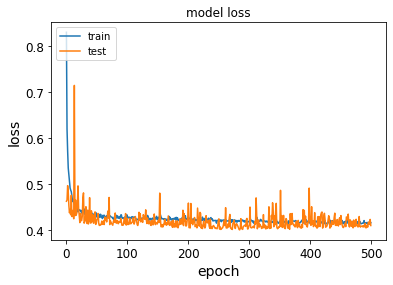

In [139]:

# summarize history for loss
plt.plot(model1.history.history['loss'])
plt.plot(model1.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [85]:
from sklearn.preprocessing import QuantileTransformer

In [87]:
quantile_transformer = QuantileTransformer(n_quantiles=100, output_distribution='normal', random_state=4)
df_num1 = quantile_transformer.fit_transform(df.loc[:,('tenure','MonthlyCharges','TotalCharges')])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3bb3ceb748>,
      dtype=object)

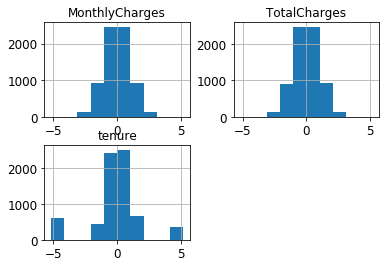

In [88]:
df_num1 = pd.DataFrame(df_num1, columns = ['tenure','MonthlyCharges','TotalCharges'])
df_num1.hist()

In [89]:
df2=pd.concat([df_num1,df_dummy],axis=1)

In [90]:
df2.shape

(7032, 35)

In [125]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(df2, df['Churn'], test_size=0.20, random_state=4)

In [118]:
model2 = models.Sequential()
model2.add(tf.keras.Input(shape=(35)))
model2.add(tf.keras.layers.Dense(300,kernel_initializer=he_init,activation=None))
model2.add(tf.keras.layers.BatchNormalization(momentum=0.9))
model2.add(tf.keras.layers.Dense(300,kernel_initializer=he_init,activation=tf.nn.selu))
model2.add(tf.keras.layers.Dropout(0.5))
model2.add(tf.keras.layers.Dense(100,kernel_initializer=he_init,activation=None))
model2.add(tf.keras.layers.BatchNormalization(momentum=0.9))
model2.add(tf.keras.layers.Dense(100,kernel_initializer=he_init,activation=tf.nn.selu))
model2.add(tf.keras.layers.Dropout(0.5))
model2.add(tf.keras.layers.Dense(2))
print(model2.summary())

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_58 (Dense)             (None, 300)               10800     
_________________________________________________________________
batch_normalization_17 (Batc (None, 300)               1200      
_________________________________________________________________
dense_59 (Dense)             (None, 300)               90300     
_________________________________________________________________
dropout_24 (Dropout)         (None, 300)               0         
_________________________________________________________________
dense_60 (Dense)             (None, 100)               30100     
_________________________________________________________________
batch_normalization_18 (Batc (None, 100)               400       
_________________________________________________________________
dense_61 (Dense)             (None, 100)             

In [120]:
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [121]:
model2.fit(x_train, y_train, epochs=500, batch_size=194, shuffle=True, validation_split=0.1)

Train on 5062 samples, validate on 563 samples
Epoch 1/500
5062/5062 [==============================] - 2s 358us/sample - loss: 0.7261 - acc: 0.6948 - val_loss: 0.4919 - val_acc: 0.7922
Epoch 2/500
5062/5062 [==============================] - 0s 49us/sample - loss: 0.5880 - acc: 0.7424 - val_loss: 0.4275 - val_acc: 0.7869
Epoch 3/500
5062/5062 [==============================] - 0s 48us/sample - loss: 0.5225 - acc: 0.7590 - val_loss: 0.4124 - val_acc: 0.7904
Epoch 4/500
5062/5062 [==============================] - 0s 51us/sample - loss: 0.5020 - acc: 0.7699 - val_loss: 0.4329 - val_acc: 0.7869
Epoch 5/500
5062/5062 [==============================] - 0s 49us/sample - loss: 0.4869 - acc: 0.7758 - val_loss: 0.4106 - val_acc: 0.7957
Epoch 6/500
5062/5062 [==============================] - 0s 48us/sample - loss: 0.4580 - acc: 0.7827 - val_loss: 0.4103 - val_acc: 0.7904
Epoch 7/500
5062/5062 [==============================] - 0s 48us/sample - loss: 0.4527 - acc: 0.7845 - val_loss: 0.4095 - va

5062/5062 [==============================] - 0s 48us/sample - loss: 0.4112 - acc: 0.8038 - val_loss: 0.4055 - val_acc: 0.7904
Epoch 60/500
5062/5062 [==============================] - 0s 47us/sample - loss: 0.4073 - acc: 0.8050 - val_loss: 0.4012 - val_acc: 0.7904
Epoch 61/500
5062/5062 [==============================] - 0s 48us/sample - loss: 0.4070 - acc: 0.8078 - val_loss: 0.4043 - val_acc: 0.7869
Epoch 62/500
5062/5062 [==============================] - 0s 47us/sample - loss: 0.4082 - acc: 0.8044 - val_loss: 0.4047 - val_acc: 0.7922
Epoch 63/500
5062/5062 [==============================] - 0s 47us/sample - loss: 0.4117 - acc: 0.8090 - val_loss: 0.4050 - val_acc: 0.7940
Epoch 64/500
5062/5062 [==============================] - 0s 48us/sample - loss: 0.4091 - acc: 0.8054 - val_loss: 0.4067 - val_acc: 0.7833
Epoch 65/500
5062/5062 [==============================] - 0s 48us/sample - loss: 0.4026 - acc: 0.8135 - val_loss: 0.4070 - val_acc: 0.7993
Epoch 66/500
5062/5062 [================

Epoch 118/500
5062/5062 [==============================] - 0s 50us/sample - loss: 0.3939 - acc: 0.8165 - val_loss: 0.4062 - val_acc: 0.7993
Epoch 119/500
5062/5062 [==============================] - 0s 48us/sample - loss: 0.3964 - acc: 0.8113 - val_loss: 0.4058 - val_acc: 0.7957
Epoch 120/500
5062/5062 [==============================] - 0s 48us/sample - loss: 0.3920 - acc: 0.8177 - val_loss: 0.4068 - val_acc: 0.8028
Epoch 121/500
5062/5062 [==============================] - 0s 50us/sample - loss: 0.3943 - acc: 0.8177 - val_loss: 0.4103 - val_acc: 0.7940
Epoch 122/500
5062/5062 [==============================] - 0s 49us/sample - loss: 0.3934 - acc: 0.8151 - val_loss: 0.4081 - val_acc: 0.8011
Epoch 123/500
5062/5062 [==============================] - 0s 48us/sample - loss: 0.3952 - acc: 0.8137 - val_loss: 0.4026 - val_acc: 0.7975
Epoch 124/500
5062/5062 [==============================] - 0s 48us/sample - loss: 0.3966 - acc: 0.8133 - val_loss: 0.4068 - val_acc: 0.7904
Epoch 125/500
5062/5

5062/5062 [==============================] - 0s 49us/sample - loss: 0.3823 - acc: 0.8151 - val_loss: 0.4073 - val_acc: 0.7993
Epoch 177/500
5062/5062 [==============================] - 0s 50us/sample - loss: 0.3815 - acc: 0.8212 - val_loss: 0.4074 - val_acc: 0.8064
Epoch 178/500
5062/5062 [==============================] - 0s 49us/sample - loss: 0.3854 - acc: 0.8137 - val_loss: 0.4054 - val_acc: 0.7975
Epoch 179/500
5062/5062 [==============================] - 0s 52us/sample - loss: 0.3813 - acc: 0.8226 - val_loss: 0.4046 - val_acc: 0.7940
Epoch 180/500
5062/5062 [==============================] - 0s 55us/sample - loss: 0.3823 - acc: 0.8194 - val_loss: 0.4068 - val_acc: 0.7957
Epoch 181/500
5062/5062 [==============================] - 0s 69us/sample - loss: 0.3797 - acc: 0.8151 - val_loss: 0.4045 - val_acc: 0.8028
Epoch 182/500
5062/5062 [==============================] - 0s 59us/sample - loss: 0.3814 - acc: 0.8179 - val_loss: 0.4071 - val_acc: 0.8028
Epoch 183/500
5062/5062 [=========

5062/5062 [==============================] - 0s 56us/sample - loss: 0.3656 - acc: 0.8287 - val_loss: 0.4247 - val_acc: 0.8028
Epoch 235/500
5062/5062 [==============================] - 0s 62us/sample - loss: 0.3706 - acc: 0.8226 - val_loss: 0.4127 - val_acc: 0.8064
Epoch 236/500
5062/5062 [==============================] - 0s 55us/sample - loss: 0.3695 - acc: 0.8226 - val_loss: 0.4094 - val_acc: 0.8046
Epoch 237/500
5062/5062 [==============================] - 0s 53us/sample - loss: 0.3701 - acc: 0.8267 - val_loss: 0.4104 - val_acc: 0.8117
Epoch 238/500
5062/5062 [==============================] - 0s 55us/sample - loss: 0.3711 - acc: 0.8230 - val_loss: 0.4104 - val_acc: 0.7957
Epoch 239/500
5062/5062 [==============================] - 0s 51us/sample - loss: 0.3727 - acc: 0.8216 - val_loss: 0.4095 - val_acc: 0.8153
Epoch 240/500
5062/5062 [==============================] - 0s 49us/sample - loss: 0.3681 - acc: 0.8246 - val_loss: 0.4205 - val_acc: 0.7957
Epoch 241/500
5062/5062 [=========

5062/5062 [==============================] - 0s 48us/sample - loss: 0.3514 - acc: 0.8317 - val_loss: 0.4283 - val_acc: 0.8064
Epoch 293/500
5062/5062 [==============================] - 0s 49us/sample - loss: 0.3551 - acc: 0.8343 - val_loss: 0.4252 - val_acc: 0.8082
Epoch 294/500
5062/5062 [==============================] - 0s 50us/sample - loss: 0.3594 - acc: 0.8333 - val_loss: 0.4196 - val_acc: 0.8064
Epoch 295/500
5062/5062 [==============================] - 0s 48us/sample - loss: 0.3552 - acc: 0.8345 - val_loss: 0.4273 - val_acc: 0.8082
Epoch 296/500
5062/5062 [==============================] - 0s 48us/sample - loss: 0.3584 - acc: 0.8345 - val_loss: 0.4299 - val_acc: 0.7975
Epoch 297/500
5062/5062 [==============================] - 0s 51us/sample - loss: 0.3506 - acc: 0.8360 - val_loss: 0.4295 - val_acc: 0.7957
Epoch 298/500
5062/5062 [==============================] - 0s 49us/sample - loss: 0.3542 - acc: 0.8345 - val_loss: 0.4299 - val_acc: 0.8082
Epoch 299/500
5062/5062 [=========

5062/5062 [==============================] - 0s 50us/sample - loss: 0.3497 - acc: 0.8289 - val_loss: 0.4317 - val_acc: 0.7957
Epoch 351/500
5062/5062 [==============================] - 0s 48us/sample - loss: 0.3487 - acc: 0.8343 - val_loss: 0.4362 - val_acc: 0.7940
Epoch 352/500
5062/5062 [==============================] - 0s 49us/sample - loss: 0.3484 - acc: 0.8360 - val_loss: 0.4343 - val_acc: 0.7957
Epoch 353/500
5062/5062 [==============================] - 0s 47us/sample - loss: 0.3443 - acc: 0.8348 - val_loss: 0.4341 - val_acc: 0.7886
Epoch 354/500
5062/5062 [==============================] - 0s 49us/sample - loss: 0.3390 - acc: 0.8412 - val_loss: 0.4466 - val_acc: 0.7975
Epoch 355/500
5062/5062 [==============================] - 0s 49us/sample - loss: 0.3503 - acc: 0.8406 - val_loss: 0.4264 - val_acc: 0.7993
Epoch 356/500
5062/5062 [==============================] - 0s 48us/sample - loss: 0.3441 - acc: 0.8404 - val_loss: 0.4277 - val_acc: 0.8028
Epoch 357/500
5062/5062 [=========

5062/5062 [==============================] - 0s 48us/sample - loss: 0.3383 - acc: 0.8400 - val_loss: 0.4561 - val_acc: 0.7904
Epoch 409/500
5062/5062 [==============================] - 0s 48us/sample - loss: 0.3364 - acc: 0.8398 - val_loss: 0.4375 - val_acc: 0.7904
Epoch 410/500
5062/5062 [==============================] - 0s 49us/sample - loss: 0.3293 - acc: 0.8449 - val_loss: 0.4517 - val_acc: 0.7815
Epoch 411/500
5062/5062 [==============================] - 0s 50us/sample - loss: 0.3295 - acc: 0.8497 - val_loss: 0.4398 - val_acc: 0.7993
Epoch 412/500
5062/5062 [==============================] - 0s 49us/sample - loss: 0.3266 - acc: 0.8495 - val_loss: 0.4539 - val_acc: 0.7940
Epoch 413/500
5062/5062 [==============================] - 0s 49us/sample - loss: 0.3260 - acc: 0.8483 - val_loss: 0.4545 - val_acc: 0.7993
Epoch 414/500
5062/5062 [==============================] - 0s 50us/sample - loss: 0.3302 - acc: 0.8459 - val_loss: 0.4528 - val_acc: 0.7904
Epoch 415/500
5062/5062 [=========

5062/5062 [==============================] - 0s 49us/sample - loss: 0.3262 - acc: 0.8465 - val_loss: 0.4531 - val_acc: 0.7904
Epoch 467/500
5062/5062 [==============================] - 0s 49us/sample - loss: 0.3243 - acc: 0.8505 - val_loss: 0.4619 - val_acc: 0.7833
Epoch 468/500
5062/5062 [==============================] - 0s 49us/sample - loss: 0.3225 - acc: 0.8524 - val_loss: 0.4655 - val_acc: 0.7940
Epoch 469/500
5062/5062 [==============================] - 0s 49us/sample - loss: 0.3264 - acc: 0.8463 - val_loss: 0.4720 - val_acc: 0.7922
Epoch 470/500
5062/5062 [==============================] - 0s 48us/sample - loss: 0.3245 - acc: 0.8479 - val_loss: 0.4648 - val_acc: 0.7940
Epoch 471/500
5062/5062 [==============================] - 0s 48us/sample - loss: 0.3224 - acc: 0.8495 - val_loss: 0.4623 - val_acc: 0.7940
Epoch 472/500
5062/5062 [==============================] - 0s 49us/sample - loss: 0.3177 - acc: 0.8558 - val_loss: 0.4617 - val_acc: 0.7957
Epoch 473/500
5062/5062 [=========

In [123]:
test_loss, test_acc = model2.evaluate(x_test,  y_test, verbose=2)

1407/1407 - 0s - loss: 0.5255 - acc: 0.7768


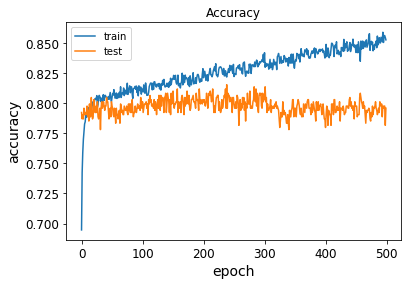

In [124]:
plt.plot(model2.history.history['acc'])
plt.plot(model2.history.history['val_acc'])
plt.title("Accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [173]:
model3 = models.Sequential()
model3.add(tf.keras.Input(shape=(35)))
model3.add(tf.keras.layers.Dense(300,kernel_initializer=he_init,activation=tf.nn.relu))
model3.add(tf.keras.layers.BatchNormalization(momentum=0.9))
model3.add(tf.keras.layers.Dense(200,kernel_initializer=he_init,activation=tf.nn.selu))
model3.add(tf.keras.layers.Dropout(0.5))
model3.add(tf.keras.layers.Dense(100,kernel_initializer=he_init,activation=tf.nn.relu))
model3.add(tf.keras.layers.BatchNormalization(momentum=0.9))
model3.add(tf.keras.layers.Dense(50,kernel_initializer=he_init,activation=tf.nn.selu))
model3.add(tf.keras.layers.Dropout(0.5))
model3.add(tf.keras.layers.Dense(2))
print(model3.summary())

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_116 (Dense)            (None, 300)               10800     
_________________________________________________________________
batch_normalization_41 (Batc (None, 300)               1200      
_________________________________________________________________
dense_117 (Dense)            (None, 200)               60200     
_________________________________________________________________
dropout_48 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_118 (Dense)            (None, 100)               20100     
_________________________________________________________________
batch_normalization_42 (Batc (None, 100)               400       
_________________________________________________________________
dense_119 (Dense)            (None, 50)              

In [174]:
model3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [175]:
model3.fit(x_train, y_train, epochs=500, batch_size=194, shuffle=True, validation_split=0.1)

Train on 5062 samples, validate on 563 samples
Epoch 1/500
5062/5062 [==============================] - 3s 543us/sample - loss: 0.7789 - acc: 0.6717 - val_loss: 0.5334 - val_acc: 0.7726
Epoch 2/500
5062/5062 [==============================] - 0s 52us/sample - loss: 0.6338 - acc: 0.7278 - val_loss: 0.4837 - val_acc: 0.7922
Epoch 3/500
5062/5062 [==============================] - 0s 51us/sample - loss: 0.5649 - acc: 0.7467 - val_loss: 0.4562 - val_acc: 0.7886
Epoch 4/500
5062/5062 [==============================] - 0s 53us/sample - loss: 0.5264 - acc: 0.7604 - val_loss: 0.4361 - val_acc: 0.7957
Epoch 5/500
5062/5062 [==============================] - 0s 52us/sample - loss: 0.5128 - acc: 0.7681 - val_loss: 0.4369 - val_acc: 0.8011
Epoch 6/500
5062/5062 [==============================] - 0s 53us/sample - loss: 0.5108 - acc: 0.7762 - val_loss: 0.4327 - val_acc: 0.7993
Epoch 7/500
5062/5062 [==============================] - 0s 52us/sample - loss: 0.4860 - acc: 0.7728 - val_loss: 0.4305 - va

5062/5062 [==============================] - 0s 52us/sample - loss: 0.4228 - acc: 0.8052 - val_loss: 0.7254 - val_acc: 0.5524
Epoch 60/500
5062/5062 [==============================] - 0s 51us/sample - loss: 0.4266 - acc: 0.8066 - val_loss: 0.4758 - val_acc: 0.7513
Epoch 61/500
5062/5062 [==============================] - 0s 52us/sample - loss: 0.4267 - acc: 0.8001 - val_loss: 0.4381 - val_acc: 0.7975
Epoch 62/500
5062/5062 [==============================] - 0s 51us/sample - loss: 0.4183 - acc: 0.8076 - val_loss: 0.4045 - val_acc: 0.8082
Epoch 63/500
5062/5062 [==============================] - 0s 51us/sample - loss: 0.4212 - acc: 0.8030 - val_loss: 0.4036 - val_acc: 0.8082
Epoch 64/500
5062/5062 [==============================] - 0s 51us/sample - loss: 0.4184 - acc: 0.8074 - val_loss: 0.4067 - val_acc: 0.7957
Epoch 65/500
5062/5062 [==============================] - 0s 52us/sample - loss: 0.4187 - acc: 0.8040 - val_loss: 0.4211 - val_acc: 0.8046
Epoch 66/500
5062/5062 [================

Epoch 118/500
5062/5062 [==============================] - 0s 51us/sample - loss: 0.4150 - acc: 0.8034 - val_loss: 0.4030 - val_acc: 0.8099
Epoch 119/500
5062/5062 [==============================] - 0s 53us/sample - loss: 0.4151 - acc: 0.8011 - val_loss: 0.4149 - val_acc: 0.8046
Epoch 120/500
5062/5062 [==============================] - 0s 52us/sample - loss: 0.4109 - acc: 0.8072 - val_loss: 0.4014 - val_acc: 0.7957
Epoch 121/500
5062/5062 [==============================] - 0s 52us/sample - loss: 0.4145 - acc: 0.8088 - val_loss: 0.4059 - val_acc: 0.7975
Epoch 122/500
5062/5062 [==============================] - 0s 52us/sample - loss: 0.4149 - acc: 0.8040 - val_loss: 0.4380 - val_acc: 0.7957
Epoch 123/500
5062/5062 [==============================] - 0s 52us/sample - loss: 0.4144 - acc: 0.8060 - val_loss: 0.5146 - val_acc: 0.6980
Epoch 124/500
5062/5062 [==============================] - 0s 52us/sample - loss: 0.4158 - acc: 0.8040 - val_loss: 0.4131 - val_acc: 0.8064
Epoch 125/500
5062/5

5062/5062 [==============================] - 0s 57us/sample - loss: 0.4073 - acc: 0.8105 - val_loss: 0.4060 - val_acc: 0.7833
Epoch 177/500
5062/5062 [==============================] - 0s 58us/sample - loss: 0.4076 - acc: 0.8129 - val_loss: 0.4076 - val_acc: 0.7975
Epoch 178/500
5062/5062 [==============================] - 0s 57us/sample - loss: 0.4101 - acc: 0.8107 - val_loss: 0.4261 - val_acc: 0.7886
Epoch 179/500
5062/5062 [==============================] - 0s 55us/sample - loss: 0.4092 - acc: 0.8090 - val_loss: 0.4100 - val_acc: 0.8028
Epoch 180/500
5062/5062 [==============================] - 0s 52us/sample - loss: 0.4111 - acc: 0.8100 - val_loss: 0.4136 - val_acc: 0.7869
Epoch 181/500
5062/5062 [==============================] - 0s 52us/sample - loss: 0.4103 - acc: 0.8076 - val_loss: 0.4152 - val_acc: 0.7940
Epoch 182/500
5062/5062 [==============================] - 0s 57us/sample - loss: 0.4073 - acc: 0.8133 - val_loss: 0.4687 - val_acc: 0.7496
Epoch 183/500
5062/5062 [=========

5062/5062 [==============================] - 0s 55us/sample - loss: 0.4050 - acc: 0.8104 - val_loss: 0.4277 - val_acc: 0.7975
Epoch 235/500
5062/5062 [==============================] - 0s 55us/sample - loss: 0.4024 - acc: 0.8133 - val_loss: 0.4087 - val_acc: 0.7904
Epoch 236/500
5062/5062 [==============================] - 0s 53us/sample - loss: 0.4029 - acc: 0.8105 - val_loss: 0.4093 - val_acc: 0.7904
Epoch 237/500
5062/5062 [==============================] - 0s 53us/sample - loss: 0.4039 - acc: 0.8135 - val_loss: 0.4843 - val_acc: 0.7922
Epoch 238/500
5062/5062 [==============================] - 0s 55us/sample - loss: 0.4061 - acc: 0.8094 - val_loss: 0.4052 - val_acc: 0.7940
Epoch 239/500
5062/5062 [==============================] - 0s 54us/sample - loss: 0.4009 - acc: 0.8151 - val_loss: 0.4150 - val_acc: 0.7922
Epoch 240/500
5062/5062 [==============================] - 0s 54us/sample - loss: 0.4050 - acc: 0.8096 - val_loss: 0.4570 - val_acc: 0.7869
Epoch 241/500
5062/5062 [=========

5062/5062 [==============================] - 0s 53us/sample - loss: 0.4060 - acc: 0.8100 - val_loss: 0.4592 - val_acc: 0.7940
Epoch 293/500
5062/5062 [==============================] - 0s 53us/sample - loss: 0.4019 - acc: 0.8105 - val_loss: 0.4296 - val_acc: 0.7975
Epoch 294/500
5062/5062 [==============================] - 0s 53us/sample - loss: 0.3987 - acc: 0.8175 - val_loss: 0.4317 - val_acc: 0.7904
Epoch 295/500
5062/5062 [==============================] - 0s 52us/sample - loss: 0.3991 - acc: 0.8143 - val_loss: 0.4326 - val_acc: 0.7957
Epoch 296/500
5062/5062 [==============================] - 0s 55us/sample - loss: 0.3974 - acc: 0.8179 - val_loss: 0.5005 - val_acc: 0.7798
Epoch 297/500
5062/5062 [==============================] - 0s 52us/sample - loss: 0.4110 - acc: 0.8054 - val_loss: 0.4219 - val_acc: 0.8117
Epoch 298/500
5062/5062 [==============================] - 0s 52us/sample - loss: 0.4033 - acc: 0.8135 - val_loss: 0.4164 - val_acc: 0.8011
Epoch 299/500
5062/5062 [=========

5062/5062 [==============================] - 0s 50us/sample - loss: 0.4016 - acc: 0.8127 - val_loss: 0.4184 - val_acc: 0.7975
Epoch 351/500
5062/5062 [==============================] - 0s 50us/sample - loss: 0.4038 - acc: 0.8137 - val_loss: 0.4171 - val_acc: 0.7851
Epoch 352/500
5062/5062 [==============================] - 0s 52us/sample - loss: 0.4021 - acc: 0.8155 - val_loss: 0.4287 - val_acc: 0.8064
Epoch 353/500
5062/5062 [==============================] - 0s 51us/sample - loss: 0.3924 - acc: 0.8190 - val_loss: 0.4257 - val_acc: 0.7904
Epoch 354/500
5062/5062 [==============================] - 0s 50us/sample - loss: 0.4023 - acc: 0.8109 - val_loss: 0.4078 - val_acc: 0.7993
Epoch 355/500
5062/5062 [==============================] - 0s 50us/sample - loss: 0.3963 - acc: 0.8171 - val_loss: 0.4149 - val_acc: 0.7904
Epoch 356/500
5062/5062 [==============================] - 0s 49us/sample - loss: 0.4011 - acc: 0.8129 - val_loss: 0.4244 - val_acc: 0.7886
Epoch 357/500
5062/5062 [=========

5062/5062 [==============================] - 0s 52us/sample - loss: 0.3913 - acc: 0.8192 - val_loss: 0.4142 - val_acc: 0.8099
Epoch 409/500
5062/5062 [==============================] - 0s 51us/sample - loss: 0.3908 - acc: 0.8202 - val_loss: 0.4265 - val_acc: 0.7940
Epoch 410/500
5062/5062 [==============================] - 0s 50us/sample - loss: 0.3966 - acc: 0.8208 - val_loss: 0.4233 - val_acc: 0.8011
Epoch 411/500
5062/5062 [==============================] - 0s 53us/sample - loss: 0.3974 - acc: 0.8210 - val_loss: 0.4191 - val_acc: 0.8046
Epoch 412/500
5062/5062 [==============================] - 0s 51us/sample - loss: 0.3975 - acc: 0.8143 - val_loss: 0.4307 - val_acc: 0.7993
Epoch 413/500
5062/5062 [==============================] - 0s 57us/sample - loss: 0.3910 - acc: 0.8196 - val_loss: 0.4137 - val_acc: 0.8064
Epoch 414/500
5062/5062 [==============================] - 0s 51us/sample - loss: 0.3950 - acc: 0.8163 - val_loss: 0.4224 - val_acc: 0.8028
Epoch 415/500
5062/5062 [=========

5062/5062 [==============================] - 0s 52us/sample - loss: 0.3970 - acc: 0.8183 - val_loss: 0.4226 - val_acc: 0.8028
Epoch 467/500
5062/5062 [==============================] - 0s 52us/sample - loss: 0.3924 - acc: 0.8175 - val_loss: 0.4233 - val_acc: 0.7957
Epoch 468/500
5062/5062 [==============================] - 0s 57us/sample - loss: 0.3921 - acc: 0.8198 - val_loss: 0.4226 - val_acc: 0.7922
Epoch 469/500
5062/5062 [==============================] - 0s 52us/sample - loss: 0.3954 - acc: 0.8141 - val_loss: 0.4297 - val_acc: 0.7975
Epoch 470/500
5062/5062 [==============================] - 0s 51us/sample - loss: 0.3914 - acc: 0.8163 - val_loss: 0.4143 - val_acc: 0.7922
Epoch 471/500
5062/5062 [==============================] - 0s 50us/sample - loss: 0.3904 - acc: 0.8194 - val_loss: 0.4412 - val_acc: 0.7904
Epoch 472/500
5062/5062 [==============================] - 0s 52us/sample - loss: 0.3919 - acc: 0.8145 - val_loss: 0.4612 - val_acc: 0.7957
Epoch 473/500
5062/5062 [=========

In [176]:
test_loss, test_acc = model3.evaluate(x_test,  y_test, verbose=2)

1407/1407 - 0s - loss: 0.4563 - acc: 0.7832
